In [1]:
import pandas as pd
import json

# Load Data

Source: <https://www.kaggle.com/datasets/prakharbhandari20/cleantech-google-patent-dataset>

In [2]:
df_google_patents = pd.read_json('../data/bq-results-20240124-055833-1706076079048.json', lines=True)
df_google_patents

,publication_number,application_number,country_code,title_localized,abstract_localized,publication_date,inventor,cpc
0,US-2022239235-A1,US-202217717397-A,US,[{'text': 'Adaptable DC-AC Inverter Drive Syst...,[{'text': 'Disclosed is an adaptable DC-AC inv...,20220728,[],"[{'code': 'H02M7/5395', 'inventive': True, 'fi..."
1,US-2022239251-A1,US-202217580956-A,US,[{'text': 'System for providing the energy fro...,[{'text': 'In accordance with an example embod...,20220728,[],"[{'code': 'H02S40/38', 'inventive': True, 'fir..."
2,EP-4033090-A1,EP-21152924-A,EP,[{'text': 'Verfahren zum steuern einer windene...,[{'text': 'Verfahren zum Steuern einer Windene...,20220727,"[Schaper, Ulf, von Aswege, Enno, Gerke Funcke,...","[{'code': 'F03D7/0276', 'inventive': True, 'fi..."
3,EP-4033090-A1,EP-21152924-A,EP,[{'text': 'Verfahren zum steuern einer windene...,[{'text': 'Verfahren zum Steuern einer Windene...,20220727,"[Schaper, Ulf, von Aswege, Enno, Gerke Funcke,...","[{'code': 'F03D7/0276', 'inventive': True, 'fi..."
4,US-11396827-B2,US-202117606042-A,US,[{'text': 'Control method for optimizing solar...,[{'text': 'A control method for optimizing a s...,20220726,[],"[{'code': 'F24S50/00', 'inventive': True, 'fir..."
...,...,...,...,...,...,...,...,...
29995,CN-214835218-U,CN-202121309411-U,CN,"[{'text': '一种具有充电功能的无人机机库', 'language': 'zh', ...",[{'text': 'The utility model relates to an unm...,20211123,"[ZHANG ANZHI, ZHANG WANYONG, HUANG HUIYONG, XU...","[{'code': 'Y02E10/50', 'inventive': False, 'fi..."
29996,CN-113690940-A,CN-202111107806-A,CN,"[{'text': '一种风电供电控制方法', 'language': 'zh', 'tru...",[{'text': 'The invention provides a wind power...,20211123,"[ZHANG YUCHUAN, LONG HAIYANG, TAN CUNZHEN]","[{'code': 'Y02E10/76', 'inventive': False, 'fi..."
29997,CN-113683210-A,CN-202110998828-A,CN,"[{'text': '一种基于无线控制的漂浮式太阳能曝气装置', 'language': '...",[{'text': '本发明公开了一种基于无线控制的漂浮式太阳能曝气装置，包括漂浮板、太阳能...,20211123,[An Zhixia],"[{'code': 'C02F2209/22', 'inventive': False, '..."
29998,CN-113683210-A,CN-202110998828-A,CN,"[{'text': '一种基于无线控制的漂浮式太阳能曝气装置', 'language': '...",[{'text': '本发明公开了一种基于无线控制的漂浮式太阳能曝气装置，包括漂浮板、太阳能...,20211123,[An Zhixia],"[{'code': 'C02F2209/22', 'inventive': False, '..."


## Flatten nested data

In [3]:
# flatten manually - not so elegant, but comprehensive

df_google_patents['title'] = df_google_patents.title_localized.apply(lambda x: x[0].get('text'))
df_google_patents['title_lang'] = df_google_patents.title_localized.apply(lambda x: x[0].get('language'))
df_google_patents['abstract'] = df_google_patents.abstract_localized.apply(lambda x: x[0].get('text'))
df_google_patents['abstract_lang'] = df_google_patents.abstract_localized.apply(lambda x: x[0].get('language'))
df_google_patents.head()

,publication_number,application_number,country_code,title_localized,abstract_localized,publication_date,inventor,cpc,title,title_lang,abstract,abstract_lang
0,US-2022239235-A1,US-202217717397-A,US,[{'text': 'Adaptable DC-AC Inverter Drive Syst...,[{'text': 'Disclosed is an adaptable DC-AC inv...,20220728,[],"[{'code': 'H02M7/5395', 'inventive': True, 'fi...",Adaptable DC-AC Inverter Drive System and Oper...,en,Disclosed is an adaptable DC-AC inverter syste...,en
1,US-2022239251-A1,US-202217580956-A,US,[{'text': 'System for providing the energy fro...,[{'text': 'In accordance with an example embod...,20220728,[],"[{'code': 'H02S40/38', 'inventive': True, 'fir...",System for providing the energy from a single ...,en,"In accordance with an example embodiment, a so...",en
2,EP-4033090-A1,EP-21152924-A,EP,[{'text': 'Verfahren zum steuern einer windene...,[{'text': 'Verfahren zum Steuern einer Windene...,20220727,"[Schaper, Ulf, von Aswege, Enno, Gerke Funcke,...","[{'code': 'F03D7/0276', 'inventive': True, 'fi...",Verfahren zum steuern einer windenergieanlage,de,Verfahren zum Steuern einer Windenergieanlage ...,de
3,EP-4033090-A1,EP-21152924-A,EP,[{'text': 'Verfahren zum steuern einer windene...,[{'text': 'Verfahren zum Steuern einer Windene...,20220727,"[Schaper, Ulf, von Aswege, Enno, Gerke Funcke,...","[{'code': 'F03D7/0276', 'inventive': True, 'fi...",Verfahren zum steuern einer windenergieanlage,de,Verfahren zum Steuern einer Windenergieanlage ...,de
4,US-11396827-B2,US-202117606042-A,US,[{'text': 'Control method for optimizing solar...,[{'text': 'A control method for optimizing a s...,20220726,[],"[{'code': 'F24S50/00', 'inventive': True, 'fir...",Control method for optimizing solar-to-power e...,en,A control method for optimizing a solar-to-pow...,en


In [4]:
# keep only necessary rows
df_google_patents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   publication_number  30000 non-null  object
 1   application_number  30000 non-null  object
 2   country_code        30000 non-null  object
 3   title_localized     30000 non-null  object
 4   abstract_localized  30000 non-null  object
 5   publication_date    30000 non-null  int64 
 6   inventor            30000 non-null  object
 7   cpc                 30000 non-null  object
 8   title               30000 non-null  object
 9   title_lang          30000 non-null  object
 10  abstract            30000 non-null  object
 11  abstract_lang       30000 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.7+ MB


## Drop unnecessary columns

In [5]:
# not sure about cpc-column. Suppose we drop it?
df_google_patents.cpc.values[:5]

array([list([{'code': 'H02M7/5395', 'inventive': True, 'first': False, 'tree': []}, {'code': 'H02J3/32', 'inventive': False, 'first': False, 'tree': []}, {'code': 'H02M1/32', 'inventive': True, 'first': False, 'tree': []}, {'code': 'H02J1/10', 'inventive': True, 'first': False, 'tree': []}, {'code': 'H02J3/381', 'inventive': True, 'first': False, 'tree': []}, {'code': 'H02M7/493', 'inventive': True, 'first': True, 'tree': []}, {'code': 'H02J2300/24', 'inventive': False, 'first': False, 'tree': []}, {'code': 'H02J2300/30', 'inventive': False, 'first': False, 'tree': []}]),
       list([{'code': 'H02S40/38', 'inventive': True, 'first': False, 'tree': []}, {'code': 'G01R22/061', 'inventive': True, 'first': False, 'tree': []}, {'code': 'B60L53/51', 'inventive': True, 'first': False, 'tree': []}, {'code': 'H02S40/32', 'inventive': True, 'first': True, 'tree': []}]),
       list([{'code': 'F03D7/0276', 'inventive': True, 'first': True, 'tree': []}, {'code': 'F03D7/0296', 'inventive': True, '

In [6]:
df_google_patents.drop(columns=['cpc', 'abstract_localized', 'title_localized'], inplace=True)
df_google_patents

,publication_number,application_number,country_code,publication_date,inventor,title,title_lang,abstract,abstract_lang
0,US-2022239235-A1,US-202217717397-A,US,20220728,[],Adaptable DC-AC Inverter Drive System and Oper...,en,Disclosed is an adaptable DC-AC inverter syste...,en
1,US-2022239251-A1,US-202217580956-A,US,20220728,[],System for providing the energy from a single ...,en,"In accordance with an example embodiment, a so...",en
2,EP-4033090-A1,EP-21152924-A,EP,20220727,"[Schaper, Ulf, von Aswege, Enno, Gerke Funcke,...",Verfahren zum steuern einer windenergieanlage,de,Verfahren zum Steuern einer Windenergieanlage ...,de
3,EP-4033090-A1,EP-21152924-A,EP,20220727,"[Schaper, Ulf, von Aswege, Enno, Gerke Funcke,...",Verfahren zum steuern einer windenergieanlage,de,Verfahren zum Steuern einer Windenergieanlage ...,de
4,US-11396827-B2,US-202117606042-A,US,20220726,[],Control method for optimizing solar-to-power e...,en,A control method for optimizing a solar-to-pow...,en
...,...,...,...,...,...,...,...,...,...
29995,CN-214835218-U,CN-202121309411-U,CN,20211123,"[ZHANG ANZHI, ZHANG WANYONG, HUANG HUIYONG, XU...",一种具有充电功能的无人机机库,zh,The utility model relates to an unmanned air v...,en
29996,CN-113690940-A,CN-202111107806-A,CN,20211123,"[ZHANG YUCHUAN, LONG HAIYANG, TAN CUNZHEN]",一种风电供电控制方法,zh,The invention provides a wind power supply con...,en
29997,CN-113683210-A,CN-202110998828-A,CN,20211123,[An Zhixia],一种基于无线控制的漂浮式太阳能曝气装置,zh,本发明公开了一种基于无线控制的漂浮式太阳能曝气装置，包括漂浮板、太阳能转化机构以及输气泵，所...,zh
29998,CN-113683210-A,CN-202110998828-A,CN,20211123,[An Zhixia],一种基于无线控制的漂浮式太阳能曝气装置,zh,本发明公开了一种基于无线控制的漂浮式太阳能曝气装置，包括漂浮板、太阳能转化机构以及输气泵，所...,zh


## Parse date column

In [7]:
# turn date into date-column
df_google_patents.publication_date = pd.to_datetime(df_google_patents.publication_date, format="%Y%m%d")
df_google_patents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   publication_number  30000 non-null  object        
 1   application_number  30000 non-null  object        
 2   country_code        30000 non-null  object        
 3   publication_date    30000 non-null  datetime64[ns]
 4   inventor            30000 non-null  object        
 5   title               30000 non-null  object        
 6   title_lang          30000 non-null  object        
 7   abstract            30000 non-null  object        
 8   abstract_lang       30000 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 2.1+ MB


## Check for duplicates

In [8]:
# abstract is propably the most important column, we check its contents
df_google_patents[df_google_patents.duplicated(subset=['abstract'], keep=False)]

,publication_number,application_number,country_code,publication_date,inventor,title,title_lang,abstract,abstract_lang
2,EP-4033090-A1,EP-21152924-A,EP,2022-07-27,"[Schaper, Ulf, von Aswege, Enno, Gerke Funcke,...",Verfahren zum steuern einer windenergieanlage,de,Verfahren zum Steuern einer Windenergieanlage ...,de
3,EP-4033090-A1,EP-21152924-A,EP,2022-07-27,"[Schaper, Ulf, von Aswege, Enno, Gerke Funcke,...",Verfahren zum steuern einer windenergieanlage,de,Verfahren zum Steuern einer Windenergieanlage ...,de
5,CN-114772674-A,CN-202210500131-A,CN,2022-07-22,[],Low-carbon running saline wastewater treatment...,en,本发明公开了一种应用太阳能和环路热管的低碳运行含盐废水处理系统及方法，属于含盐废水低碳处理领...,zh
6,CN-217026795-U,CN-202220668705-U,CN,2022-07-22,[],Water ecological remediation device convenient...,en,本实用新型公开了一种便于调节高度的水生态修复装置，涉及水生态修复技术领域。本实用新型包括底板...,zh
7,CN-114777546-A,CN-202210702520-A,CN,2022-07-22,[],Cold and hot medium energy storage hot water a...,en,The invention relates to the technical field o...,en
...,...,...,...,...,...,...,...,...,...
29991,CN-214811978-U,CN-202121614511-U,CN,2021-11-23,"[ZHANG HUANBING, YE CHANGHAI]",一种太阳能光热木基材料有害物质净化设备,zh,本实用新型公开了一种太阳能光热木基材料有害物质净化设备，涉及人造板加工设备技术领域；所采用的...,zh
29992,CN-214811978-U,CN-202121614511-U,CN,2021-11-23,"[ZHANG HUANBING, YE CHANGHAI]",一种太阳能光热木基材料有害物质净化设备,zh,本实用新型公开了一种太阳能光热木基材料有害物质净化设备，涉及人造板加工设备技术领域；所采用的...,zh
29997,CN-113683210-A,CN-202110998828-A,CN,2021-11-23,[An Zhixia],一种基于无线控制的漂浮式太阳能曝气装置,zh,本发明公开了一种基于无线控制的漂浮式太阳能曝气装置，包括漂浮板、太阳能转化机构以及输气泵，所...,zh
29998,CN-113683210-A,CN-202110998828-A,CN,2021-11-23,[An Zhixia],一种基于无线控制的漂浮式太阳能曝气装置,zh,本发明公开了一种基于无线控制的漂浮式太阳能曝气装置，包括漂浮板、太阳能转化机构以及输气泵，所...,zh


In [9]:
# quite some duplicates found - let's drop them
df_google_patents.drop_duplicates(subset=['abstract'], inplace=True)
df_google_patents

,publication_number,application_number,country_code,publication_date,inventor,title,title_lang,abstract,abstract_lang
0,US-2022239235-A1,US-202217717397-A,US,2022-07-28,[],Adaptable DC-AC Inverter Drive System and Oper...,en,Disclosed is an adaptable DC-AC inverter syste...,en
1,US-2022239251-A1,US-202217580956-A,US,2022-07-28,[],System for providing the energy from a single ...,en,"In accordance with an example embodiment, a so...",en
2,EP-4033090-A1,EP-21152924-A,EP,2022-07-27,"[Schaper, Ulf, von Aswege, Enno, Gerke Funcke,...",Verfahren zum steuern einer windenergieanlage,de,Verfahren zum Steuern einer Windenergieanlage ...,de
4,US-11396827-B2,US-202117606042-A,US,2022-07-26,[],Control method for optimizing solar-to-power e...,en,A control method for optimizing a solar-to-pow...,en
5,CN-114772674-A,CN-202210500131-A,CN,2022-07-22,[],Low-carbon running saline wastewater treatment...,en,本发明公开了一种应用太阳能和环路热管的低碳运行含盐废水处理系统及方法，属于含盐废水低碳处理领...,zh
...,...,...,...,...,...,...,...,...,...
29993,CN-214850044-U,CN-202120980740-U,CN,2021-11-23,"[WANG HAI, WANG YANG]",一种可调节太阳能板朝向的箱变,zh,The utility model relates to a case becomes te...,en
29994,CN-214840532-U,CN-202121225269-U,CN,2021-11-23,"[Gao Zhelu, Dai Jiangyue, LIU ZIYI, YAN CONGQI...",Garden waste anaerobic fermentation coupling m...,en,The utility model discloses a gardens discarde...,en
29995,CN-214835218-U,CN-202121309411-U,CN,2021-11-23,"[ZHANG ANZHI, ZHANG WANYONG, HUANG HUIYONG, XU...",一种具有充电功能的无人机机库,zh,The utility model relates to an unmanned air v...,en
29996,CN-113690940-A,CN-202111107806-A,CN,2021-11-23,"[ZHANG YUCHUAN, LONG HAIYANG, TAN CUNZHEN]",一种风电供电控制方法,zh,The invention provides a wind power supply con...,en


We are left with 13'297 patents to work with.

# First Overview

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

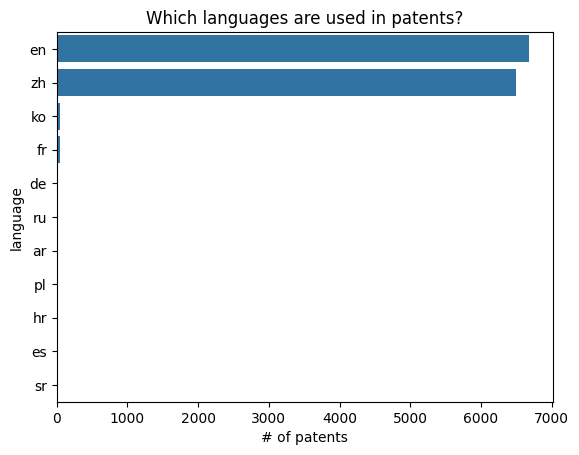

In [11]:
# there seem to be different languages, let's check

sns.countplot(
    df_google_patents, 
    y="abstract_lang", 
    order=df_google_patents['abstract_lang'].value_counts().index)

plt.title("Which languages are used in patents?")
plt.xlabel("# of patents")
plt.ylabel("language")
plt.show()

# Text preprocessing

In [12]:
import re
import nltk
df_google_patents

,publication_number,application_number,country_code,publication_date,inventor,title,title_lang,abstract,abstract_lang
0,US-2022239235-A1,US-202217717397-A,US,2022-07-28,[],Adaptable DC-AC Inverter Drive System and Oper...,en,Disclosed is an adaptable DC-AC inverter syste...,en
1,US-2022239251-A1,US-202217580956-A,US,2022-07-28,[],System for providing the energy from a single ...,en,"In accordance with an example embodiment, a so...",en
2,EP-4033090-A1,EP-21152924-A,EP,2022-07-27,"[Schaper, Ulf, von Aswege, Enno, Gerke Funcke,...",Verfahren zum steuern einer windenergieanlage,de,Verfahren zum Steuern einer Windenergieanlage ...,de
4,US-11396827-B2,US-202117606042-A,US,2022-07-26,[],Control method for optimizing solar-to-power e...,en,A control method for optimizing a solar-to-pow...,en
5,CN-114772674-A,CN-202210500131-A,CN,2022-07-22,[],Low-carbon running saline wastewater treatment...,en,本发明公开了一种应用太阳能和环路热管的低碳运行含盐废水处理系统及方法，属于含盐废水低碳处理领...,zh
...,...,...,...,...,...,...,...,...,...
29993,CN-214850044-U,CN-202120980740-U,CN,2021-11-23,"[WANG HAI, WANG YANG]",一种可调节太阳能板朝向的箱变,zh,The utility model relates to a case becomes te...,en
29994,CN-214840532-U,CN-202121225269-U,CN,2021-11-23,"[Gao Zhelu, Dai Jiangyue, LIU ZIYI, YAN CONGQI...",Garden waste anaerobic fermentation coupling m...,en,The utility model discloses a gardens discarde...,en
29995,CN-214835218-U,CN-202121309411-U,CN,2021-11-23,"[ZHANG ANZHI, ZHANG WANYONG, HUANG HUIYONG, XU...",一种具有充电功能的无人机机库,zh,The utility model relates to an unmanned air v...,en
29996,CN-113690940-A,CN-202111107806-A,CN,2021-11-23,"[ZHANG YUCHUAN, LONG HAIYANG, TAN CUNZHEN]",一种风电供电控制方法,zh,The invention provides a wind power supply con...,en


# Translate

In [59]:
from translate import Translator

import time
# Function to translate abstract to English with retry and timeout mechanism
def translate_abstract(row):
    abstract = row['abstract']
    lang = row['abstract_lang']
    
    # Translate only if the language is not English
    if lang != 'en':
        max_retries = 3  # Maximum number of retries
        retry_delay = 2  # Delay between retries in seconds
        timeout = 10  # Timeout in seconds

        for _ in range(max_retries):
            try:
                translator = Translator(to_lang="en", from_lang=lang, timeout=timeout)
                translation = translator.translate(abstract)
                print(translation)
                return translation
            except Exception as e:
                print(f"Translation failed: {e}")
                print("Retrying...")
                time.sleep(retry_delay)  # Wait before retrying

        # If all retries fail, return the original abstract
        return abstract
    else:
        return abstract

# Create a new DataFrame column for English translations
df_google_patents['english_translation'] = df_google_patents.apply(translate_abstract, axis=1)
df_google_patents['english_translation']

QUERY LENGTH LIMIT EXCEEDED. MAX ALLOWED QUERY : 500 CHARS QUERY LENGTH LIMIT EXCEEDED. MAX ALLOWED QUERY : 500 CHARS
The present disclosure discloses a low-carbon operating saline wastewater treatment system and method using solar energy and loop heat pipes, which belongs to the field of low-carbon treatment of saline wastewater. The present invention mainly solves the problem of high carbon emissions caused by the power consumption of compressors in the field of salt wastewater treatment technology and the first operation of raw steam. The invention consists of a high-temperature condensate preheating system, a solar heating system, a loop heat pipe condensation system, and a waste heat condensation system. Preheat the salt-containing wastewater with the residual heat of the condensed water, coupling the solar heat absorption film with the salt-containing wastewater to further increase the temperature of the salt-containing wastewater and reduce the heat required for evaporation outs

KeyboardInterrupt: 

# Tokenize Words

In [24]:
# Function to clean and extract data
def tokenize_column(data):
    # Split the data based on the pattern '(extra_info)'
    re_tokens = re.findall('[\w]+', data)
    # Return the first part, which is the cleaned data
    return re_tokens

df_google_patents["token_content"] = df_google_patents["abstract"].apply(tokenize_column)

df_google_patents["token_content"]

0        [Disclosed, is, an, adaptable, DC, AC, inverte...
1        [In, accordance, with, an, example, embodiment...
2        [Verfahren, zum, Steuern, einer, Windenergiean...
4        [A, control, method, for, optimizing, a, solar...
5        [本发明公开了一种应用太阳能和环路热管的低碳运行含盐废水处理系统及方法, 属于含盐废水低碳处...
                               ...                        
29993    [The, utility, model, relates, to, a, case, be...
29994    [The, utility, model, discloses, a, gardens, d...
29995    [The, utility, model, relates, to, an, unmanne...
29996    [The, invention, provides, a, wind, power, sup...
29997    [本发明公开了一种基于无线控制的漂浮式太阳能曝气装置, 包括漂浮板, 太阳能转化机构以及输气...
Name: token_content, Length: 13297, dtype: object

# Stopwords Removal

In [25]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words_nltk = stopwords.words('english')

# Function to remove the stopwords
def stopwords_removal(data):
    # Split the data based on the pattern '(extra_info)'
    filtered_stopwords = []
    for word in data:
        if word.lower() not in stop_words_nltk:
            filtered_stopwords.append(word)
        else:
            pass

    return filtered_stopwords

# Apply stopwords removal function to the 'content' column
df_google_patents["token_content"] = df_google_patents["token_content"].apply(stopwords_removal)

print(len(df_google_patents["token_content"] ), df_google_patents["token_content"] )

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Viktor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


13297 0        [Disclosed, adaptable, DC, AC, inverter, syste...
1        [accordance, example, embodiment, solar, energ...
2        [Verfahren, zum, Steuern, einer, Windenergiean...
4        [control, method, optimizing, solar, power, ef...
5        [本发明公开了一种应用太阳能和环路热管的低碳运行含盐废水处理系统及方法, 属于含盐废水低碳处...
                               ...                        
29993    [utility, model, relates, case, becomes, techn...
29994    [utility, model, discloses, gardens, discarded...
29995    [utility, model, relates, unmanned, air, vehic...
29996    [invention, provides, wind, power, supply, con...
29997    [本发明公开了一种基于无线控制的漂浮式太阳能曝气装置, 包括漂浮板, 太阳能转化机构以及输气...
Name: token_content, Length: 13297, dtype: object


# Lemmatization

In [26]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize lemmatizer
nltk_lemmatizer = WordNetLemmatizer()

# Function to lemmatize
def lemmatize_tokens(tokens):
    lemmatized_tokens = [nltk_lemmatizer.lemmatize(w) for w in tokens]
    return lemmatized_tokens

df_google_patents["token_content"] = df_google_patents["token_content"].apply(lemmatize_tokens)

# Display the DataFrame
print(df_google_patents["token_content"])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Viktor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Viktor\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0        [Disclosed, adaptable, DC, AC, inverter, syste...
1        [accordance, example, embodiment, solar, energ...
2        [Verfahren, zum, Steuern, einer, Windenergiean...
4        [control, method, optimizing, solar, power, ef...
5        [本发明公开了一种应用太阳能和环路热管的低碳运行含盐废水处理系统及方法, 属于含盐废水低碳处...
                               ...                        
29993    [utility, model, relates, case, becomes, techn...
29994    [utility, model, discloses, garden, discarded,...
29995    [utility, model, relates, unmanned, air, vehic...
29996    [invention, provides, wind, power, supply, con...
29997    [本发明公开了一种基于无线控制的漂浮式太阳能曝气装置, 包括漂浮板, 太阳能转化机构以及输气...
Name: token_content, Length: 13297, dtype: object


In [27]:
print(df_google_patents["token_content"].iloc[0])

['Disclosed', 'adaptable', 'DC', 'AC', 'inverter', 'system', 'operation', 'system', 'includes', 'multiple', 'DC', 'input', 'source', 'input', 'provide', 'stable', 'operation', 'various', 'condition', 'DC', 'input', 'source', 'may', 'added', 'system', 'removed', 'system', 'without', 'impacting', 'functionality', 'system', 'disclosed', 'system', 'suited', 'solar', 'energy', 'harvesting', 'grid', 'connected', 'grid', 'mode', 'operation']


# Adding Pos Tags

In [28]:
from nltk.corpus import wordnet as wn
from nltk import pos_tag
from collections import defaultdict

# Download NLTK resources
nltk.download('averaged_perceptron_tagger')

# Initialize default tag mapping
tag_map_nltk = defaultdict(lambda : wn.NOUN)
tag_map_nltk['J'] = wn.ADJ
tag_map_nltk['V'] = wn.VERB
tag_map_nltk['R'] = wn.ADV

# Function to lemmatize tokens with POS tagging
def adding_pos_tags(tokens):
    nltk_lemmatizer = nltk.WordNetLemmatizer()
    pos_tags = pos_tag(tokens)
    lemmatized_tokens = [nltk_lemmatizer.lemmatize(token, tag_map_nltk[tag[0]]) for token, tag in pos_tags]
    return lemmatized_tokens

df_google_patents["token_content"] = df_google_patents["token_content"].apply(adding_pos_tags)

# Display the DataFrame
print(df_google_patents["token_content"])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Viktor\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


0        [Disclosed, adaptable, DC, AC, inverter, syste...
1        [accordance, example, embodiment, solar, energ...
2        [Verfahren, zum, Steuern, einer, Windenergiean...
4        [control, method, optimize, solar, power, effi...
5        [本发明公开了一种应用太阳能和环路热管的低碳运行含盐废水处理系统及方法, 属于含盐废水低碳处...
                               ...                        
29993    [utility, model, relate, case, become, technic...
29994    [utility, model, disclose, garden, discard, ob...
29995    [utility, model, relates, unmanned, air, vehic...
29996    [invention, provide, wind, power, supply, cont...
29997    [本发明公开了一种基于无线控制的漂浮式太阳能曝气装置, 包括漂浮板, 太阳能转化机构以及输气...
Name: token_content, Length: 13297, dtype: object


# Stemming

In [29]:
from nltk.stem import PorterStemmer

# Initialize Porter Stemmer
ps = PorterStemmer()

# Function to stem tokens
def stem_tokens(tokens):
    stemmed_tokens = [ps.stem(w) for w in tokens]
    return stemmed_tokens

df_google_patents["token_content"] = df_google_patents["token_content"].apply(stem_tokens)

# Display the DataFrame
print(df_google_patents["token_content"])

0        [disclos, adapt, dc, ac, invert, system, oper,...
1        [accord, exampl, embodi, solar, energi, system...
2        [verfahren, zum, steuern, einer, windenergiean...
4        [control, method, optim, solar, power, effici,...
5        [本发明公开了一种应用太阳能和环路热管的低碳运行含盐废水处理系统及方法, 属于含盐废水低碳处...
                               ...                        
29993    [util, model, relat, case, becom, technic, fie...
29994    [util, model, disclos, garden, discard, object...
29995    [util, model, relat, unman, air, vehicl, techn...
29996    [invent, provid, wind, power, suppli, control,...
29997    [本发明公开了一种基于无线控制的漂浮式太阳能曝气装置, 包括漂浮板, 太阳能转化机构以及输气...
Name: token_content, Length: 13297, dtype: object


In [30]:
print(df_google_patents["token_content"].iloc[0])

['disclos', 'adapt', 'dc', 'ac', 'invert', 'system', 'oper', 'system', 'includ', 'multipl', 'dc', 'input', 'sourc', 'input', 'provid', 'stabl', 'oper', 'variou', 'condit', 'dc', 'input', 'sourc', 'may', 'add', 'system', 'remov', 'system', 'without', 'impact', 'function', 'system', 'disclos', 'system', 'suit', 'solar', 'energi', 'harvest', 'grid', 'connect', 'grid', 'mode', 'oper']
